# 내일 비가 올지 예측(Rain in Australia)
- 참고 : https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
- 랜덤 포레스트(Random Forest)

## 먼저 아래 링크에서 weatherAUS.csv 파일을 다운로드 받기

### https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## 관련 라이브러리 import

In [1]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

## 데이터 읽기

### 데이터 로딩

In [3]:
df = pd.read_csv('ml_datas/weatherAUS.csv')
print(df.shape)

(145460, 23)


## 데이터 형상 파악하기

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## 범주형 데이터 통계량 확인

In [7]:
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
print(cat_columns)
df[cat_columns].describe()

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


### 데이터 분석

<Axes: xlabel='RainTomorrow', ylabel='count'>

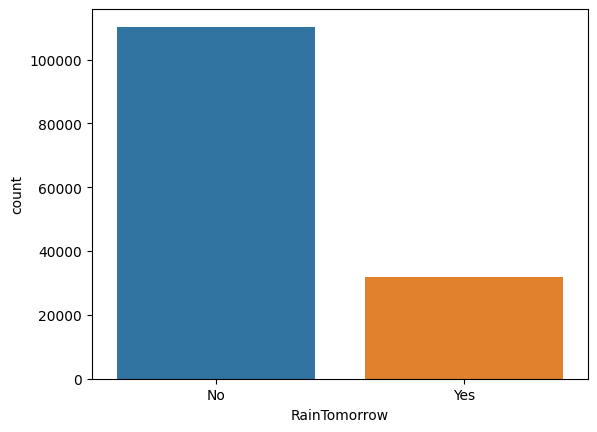

In [9]:
sns.countplot(x="RainTomorrow", data=df)

## 상관 분석(Correlation Analysis) 수행해보기

In [11]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [12]:
temp_df = df[num_cols]

In [13]:
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [14]:
temp_df.shape

(145460, 16)

### 데이터 전처리

### data mapping

In [15]:
mapping = {
            "No" : 0,
            "Yes": 1
            }

In [16]:
# Yes/No 값을 0, 1로 변경
temp_df["RainToday"] = df["RainToday"].map(mapping)
temp_df["RainTomorrow"] = df["RainTomorrow"].map(mapping)

In [17]:
temp_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


## 상관관계 계수 확인

In [18]:
corr = temp_df.corr()

In [36]:
plt.figure(figsize=(50, 50))

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

In [35]:
# plot 글자 크기 설정
sns.set(font_scale=1.5)

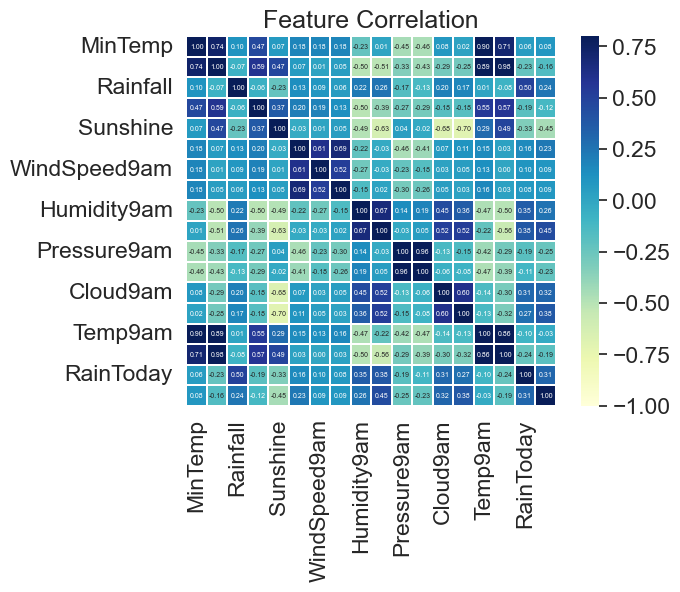

In [38]:
sns.heatmap(corr,
            vmax=0.8,
            vmin=-1,
            linewidths=0.01,
            square=True,
            annot=True,
            fmt = ".2f",
            annot_kws={"size" : 5},
            cmap="YlGnBu");
plt.title("Feature Correlation");

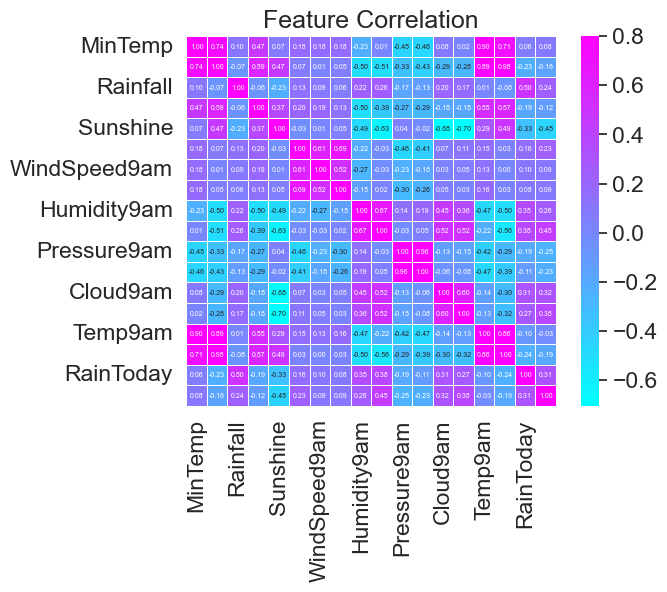

In [48]:
sns.heatmap(corr,
            vmax=0.8,
            # vmin=-1,
            linewidths=0.5,
            square=True,
            annot=True,
            fmt = ".2f",
            annot_kws={"size" : 5},
            cmap="cool");
plt.title("Feature Correlation");

## 결측치(null값) 확인하기 - data 전처리

In [52]:
# null값의 평균을 계산하여 컬럼별 null의 비율 확인
# df.isnull()
df.isnull().mean().sort_values()

Date             0.000000
Location         0.000000
MaxTemp          0.008669
MinTemp          0.010209
Temp9am          0.012148
WindSpeed9am     0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
Rainfall         0.022419
RainToday        0.022419
RainTomorrow     0.022460
Temp3pm          0.024811
WindDir3pm       0.029066
Humidity3pm      0.030984
WindGustSpeed    0.070555
WindGustDir      0.070989
WindDir9am       0.072639
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

## categorical column 확인하기

In [53]:
print(cat_columns)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


## numerical column 확인하기

In [54]:
print(num_cols)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


## 결측치 개수 확인하기

In [56]:
# categorical column의 null 비율
df[cat_columns].isnull().mean().sort_values()

Date            0.000000
Location        0.000000
RainToday       0.022419
RainTomorrow    0.022460
WindDir3pm      0.029066
WindGustDir     0.070989
WindDir9am      0.072639
dtype: float64

In [58]:
# numerical column의 null 비율
df[num_cols].isnull().mean().sort_values()

MaxTemp          0.008669
MinTemp          0.010209
WindSpeed9am     0.012148
Temp9am          0.012148
Humidity9am      0.018246
WindSpeed3pm     0.021050
Rainfall         0.022419
Temp3pm          0.024811
Humidity3pm      0.030984
WindGustSpeed    0.070555
Pressure3pm      0.103314
Pressure9am      0.103568
Cloud9am         0.384216
Cloud3pm         0.408071
Evaporation      0.431665
Sunshine         0.480098
dtype: float64

## numerical value를 가진 column은 중위값(meidan)으로 결측치 채우기

In [60]:
df["Sunshine"] = df["Sunshine"].fillna(df["Sunshine"].median())

In [66]:
# numerical value를 가진 column은 중위값(meidan)으로 결측치 채우기
for col in num_cols:
    # print(col)
    if df[col].isnull().mean() > 0:
        # print(df[col].isnull().mean())
        col_median = df[col].median()
        # print(col_median)
        df[col] = df[col].fillna(col_median)
        # print(df[col].isnull().value_count)

In [68]:
# categorical 커럼에서 0 이상인것 출력 확인
for col in cat_columns:
    if df[col].isnull().mean() > 0:
        print(col, (df[col].isnull().mean()))

WindGustDir 0.0709885879279527
WindDir9am 0.07263852605527293
WindDir3pm 0.02906641000962464
RainToday 0.022418534304963565
RainTomorrow 0.02245978275814657


In [71]:
print(df["WindGustDir"].mode()[0])
print(df["WindDir9am"].mode()[0])
print(df["WindDir3pm"].mode()[0])
print(df["RainToday"].mode()[0])

W
N
SE
No


In [74]:
# categorical value를 가진 column은 최빈값(mode)으로 결측치 채우기
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].mode()[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].mode()[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0])
df["RainToday"] = df["RainToday"].fillna(df["RainToday"].mode()[0])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [76]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [77]:
df = df.drop(["Date"], axis=1)

In [78]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [79]:
df.isnull().mean().sort_values()

Location         0.00000
Temp3pm          0.00000
Temp9am          0.00000
Cloud3pm         0.00000
Cloud9am         0.00000
Pressure3pm      0.00000
Pressure9am      0.00000
Humidity3pm      0.00000
Humidity9am      0.00000
WindSpeed3pm     0.00000
WindSpeed9am     0.00000
WindDir3pm       0.00000
WindDir9am       0.00000
WindGustSpeed    0.00000
WindGustDir      0.00000
Sunshine         0.00000
Evaporation      0.00000
Rainfall         0.00000
MaxTemp          0.00000
MinTemp          0.00000
RainToday        0.00000
RainTomorrow     0.02246
dtype: float64

## RainTomorrow가 null인 row들 삭제하기
- 예측 값이므로 null 값 삭제함

In [80]:
df.shape

(145460, 22)

In [81]:
df.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
dtype: int64

In [85]:
# RainTomorrow는 target 이기 때문에 결측치가 존재하지만 결측치 처리를 따로 하지 않음
#df.dropna(how='any', inplace=True)
df = df.dropna(subset=["RainTomorrow"]) # subset으로 df 의 컬럼을 선택해주기 때문에 그 컬럼에 적용하는 게 아니라 df 자체에 dropna를 적용

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  object 
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  object 
 9   WindDir3pm     142193 non-null  object 
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-null  fl

## Yes/No 값에 대한 변환

In [87]:
mapping = {
            "No" : 0,
            "Yes": 1
            }

In [89]:
# Yes/No 값을 0, 1로 변경하기
df["RainToday"] = df["RainToday"].replace(mapping)
df["RainTomorrow"] = df["RainTomorrow"].replace(mapping)

## categorical value에 one-hot encoding 적용하기

In [91]:
cat_columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [92]:
df = pd.get_dummies(df, columns=["Location", "WindGustDir", "WindDir9am", "WindDir3pm"])

In [93]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,31.0,15.0,13.0,59.0,27.0,...,False,False,False,False,False,False,False,False,False,False
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,...,False,False,False,False,False,False,False,False,False,False
145456,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,...,False,False,False,False,False,False,False,False,False,False
145457,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,...,False,False,False,False,False,False,False,False,True,False


In [94]:
df.shape

(142193, 115)

## 머신러닝 모델학습, 테스트를 위한 데이터 준비하기

In [96]:
X = df.drop(["RainTomorrow"], axis=1)

In [97]:
y = df["RainTomorrow"]

In [98]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [99]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

### feature / target 분리

In [100]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2023)

## 결정 트리(Decision Tree)로 내일 비가 올지 안올지 예측해보기

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


### 모델 객체 생성

In [102]:
df_clf = DecisionTreeClassifier()

### 학습

In [103]:
df_clf.fit(train_X, train_y)

DecisionTreeClassifier()

### 테스트

In [105]:
pred_y = df_clf.predict(test_X)

In [106]:
pred_y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### 평가

In [107]:
score = accuracy_score(test_y, pred_y)
print("결정 트리(Decision Tree) Accuracy : ", score)

결정 트리(Decision Tree) Accuracy :  0.7897463547283042


## [문제] 정확도, 정밀도, 재현율, f1-스코아를 값을 확인해 보세요.

In [108]:
from sklearn.metrics import classification_report

In [110]:
# classification_report() 결과 출력
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     33095
           1       0.53      0.54      0.54      9563

    accuracy                           0.79     42658
   macro avg       0.70      0.70      0.70     42658
weighted avg       0.79      0.79      0.79     42658



# 랜덤 포레스트(Random Forest)로
- 참고 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- DT default = 100개를 만들어서 학습을 시킴

In [111]:
from sklearn.ensemble import RandomForestClassifier

### 모델 객체 생성

In [112]:
rf_clf = RandomForestClassifier()

### 학습

In [113]:
rf_clf.fit(train_X, train_y)

RandomForestClassifier()

### 테스트

In [114]:
y_pred = rf_clf.predict(test_X)

In [115]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
# 정확도 평가
random_score = accuracy_score(test_y, y_pred)
print("랜덤 포레스트(Random Forest) Accuracy : ", random_score)

랜덤 포레스트(Random Forest) Accuracy :  0.8565099160767031


In [118]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     33095
           1       0.78      0.50      0.61      9563

    accuracy                           0.86     42658
   macro avg       0.82      0.73      0.76     42658
weighted avg       0.85      0.86      0.84     42658

